In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib.pyplot import figure
import numpy as np
sns.set_style('whitegrid')
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error ,mean_squared_error
from sklearn.model_selection import GridSearchCV


# Visualización

In [3]:
df = pd.read_csv('data/raw/coches-de-segunda-mano-sample.csv')
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


In [6]:
df.columns

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

# Limpieza de datos

In [4]:
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


# Función limpieza - feature engineering

In [5]:
def drop_colum(x):
    x.drop(['url','company','price_financed','is_professional','dealer','version','country','publish_date','insert_date'],axis=1,inplace=True)

In [7]:
def limpieza(x):
    
    fuel = []
    
    for i in x['fuel']:
        if i =='Gas natural (CNG)':
            i = 4
            fuel.append(i)
        elif i == 'Gasolina':
            i = 4
            fuel.append(i)
        elif i == 'Híbrido enchufable':
            i = 6
            fuel.append(i)
        elif i == 'Eléctrico' or i == 'Híbrido':
            i = 5
            fuel.append(i)
        elif i == "Diésel":
            i = 3
            fuel.append(i)
        elif i == 'Gas':
            i =2
            fuel.append(i)
        else:
            i = 1
            fuel.append(i)

    shift = []
    for i in x['shift']:
        if i == 'Manual':
            i = 2 
            shift.append(i)
        elif i == 'Automático':
            i = 3 
            shift.append(i)
        else:
            i = 1
            shift.append(i)



    colores = []
    for i in x['color']:
        if i == 'Plata':
            i = 1
            colores.append(i)
            
        elif i == 'Negro':
            i = 2
            colores.append(i)

        elif i == 'Blanco':
            i = 3
            colores.append(i)

        else:
            i = 4
            colores.append(i)
    
    
    marca = []
    for i in x['make']:
        if i == "BENTLEY" or i == "FERRARI" or i =="LAMBORGHINI":
            i = 5
            marca.append(i)
        elif i =="ASTON MARTIN" or i =="ALPINE" or i =="PORSCHE" or i=="MASERATI" or i=="TESLA":
            i = 4
            marca.append(i)
        elif i == "CORVETTE" or i=="CUPRA" or i=="LAND-ROVER" or i=="HUMMER" or i=="LOTUS" or i== "ISUZU" or i=="MORGAN" or i=="JAGUAR" or i=="MERCEDES-BENZ":
            i = 3
            marca.append(i)

        elif i == "DS" or i=="LEXUS" or i=="JEEP" or i=="DFSK" or i=="VOLVO" or i=="BMW" or i=="AUDI" or i=="SUBARU" or i=="INFINIT" or i=="MAXUS" or i=="ABARTH":
            i = 2
            marca.append(i)
        else:
            i=1
            marca.append(i)

    puertas = []
    
    for i in x['doors']:
        if i == 4 or i == 5:
            i = 2
            puertas.append(i)
        elif  i == 2:
            i = 3
            puertas.append(i)
        else:
            i = 1
            puertas.append(i)


    le = LabelEncoder()
    le.fit(x['province'])
    x['province'] = le.transform(x['province'])

    le = LabelEncoder()
    le.fit(x['model'])
    x['model'] = le.transform(x['model'])
    
    x['make'] = marca
    x['shift'] = shift
    x['color'] = colores
    x['fuel'] = fuel
    x['doors'] = puertas

    x['model'].fillna('León',inplace=True)
    x['make'].fillna('CITROEN',inplace=True)
    x['fuel'].fillna('Gasolina',inplace=True) 
    x['year'].fillna(2019,inplace=True)
    x = x.dropna(inplace=True)  
       
    

In [10]:
drop_colum(df)

In [11]:
limpieza(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41472 entries, 1 to 49999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   make      41472 non-null  int64  
 1   model     41472 non-null  int32  
 2   price     41472 non-null  int64  
 3   fuel      41472 non-null  int64  
 4   year      41472 non-null  float64
 5   kms       41472 non-null  int64  
 6   power     41472 non-null  float64
 7   doors     41472 non-null  int64  
 8   shift     41472 non-null  int64  
 9   color     41472 non-null  int64  
 10  photos    41472 non-null  int64  
 11  province  41472 non-null  int32  
dtypes: float64(2), int32(2), int64(8)
memory usage: 3.8 MB


# Dataset limpio y listo para preparar model ML

In [33]:
df.rename(columns={'make':'Marca',
                    'model':'Modelo',
                    'price':'Precio',
                    'fuel':'Tipo_Combustible',
                    'year':'Año',
                    'power':'CV',
                    'doors':'N_Puertas',
                    'shift':'Tipo_Cambio',
                    'photos':'N_Fotos',
                    'province':'Provincia'},inplace=True)
df.to_csv('data/coches_segunda_mano_ML.csv',index=False)

# EDA

<AxesSubplot:>

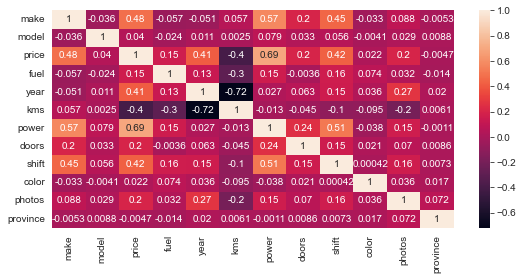

In [211]:
plt.figure(figsize=(9,4))
sns.heatmap(df.corr(),annot=True);

In [70]:
p_marcas =df.groupby('make',as_index=False)[['price']].mean()
p_marcas= p_marcas.sort_values(by='price',ascending=False)

              make          price
35     LAMBORGHINI  252112.375000
21         FERRARI  163291.290323
6          BENTLEY  134285.720000
3     ASTON MARTIN   89578.666667
2           ALPINE   66000.000000
55         PORSCHE   63161.690619
42        MASERATI   57921.360656
67           TESLA   53672.956522
12        CORVETTE   43830.000000
13           CUPRA   37737.933333
37      LAND-ROVER   35350.329159
26          HUMMER   32999.500000
40           LOTUS   29850.000000
29           ISUZU   29172.428571
49          MORGAN   29000.000000
32          JAGUAR   28630.945338
45   MERCEDES-BENZ   27058.927303
20              DS   24930.544000
39           LEXUS   24627.118081
33            JEEP   24536.613718
17            DFSK   24421.625000
71           VOLVO   23154.913103
7              BMW   21749.591407
4             AUDI   21651.026106
64          SUBARU   21011.494505
28        INFINITI   20479.800000
43           MAXUS   20290.000000
0           ABARTH   19098.333333
19  DR AUTOMOB

<AxesSubplot:xlabel='price', ylabel='make'>

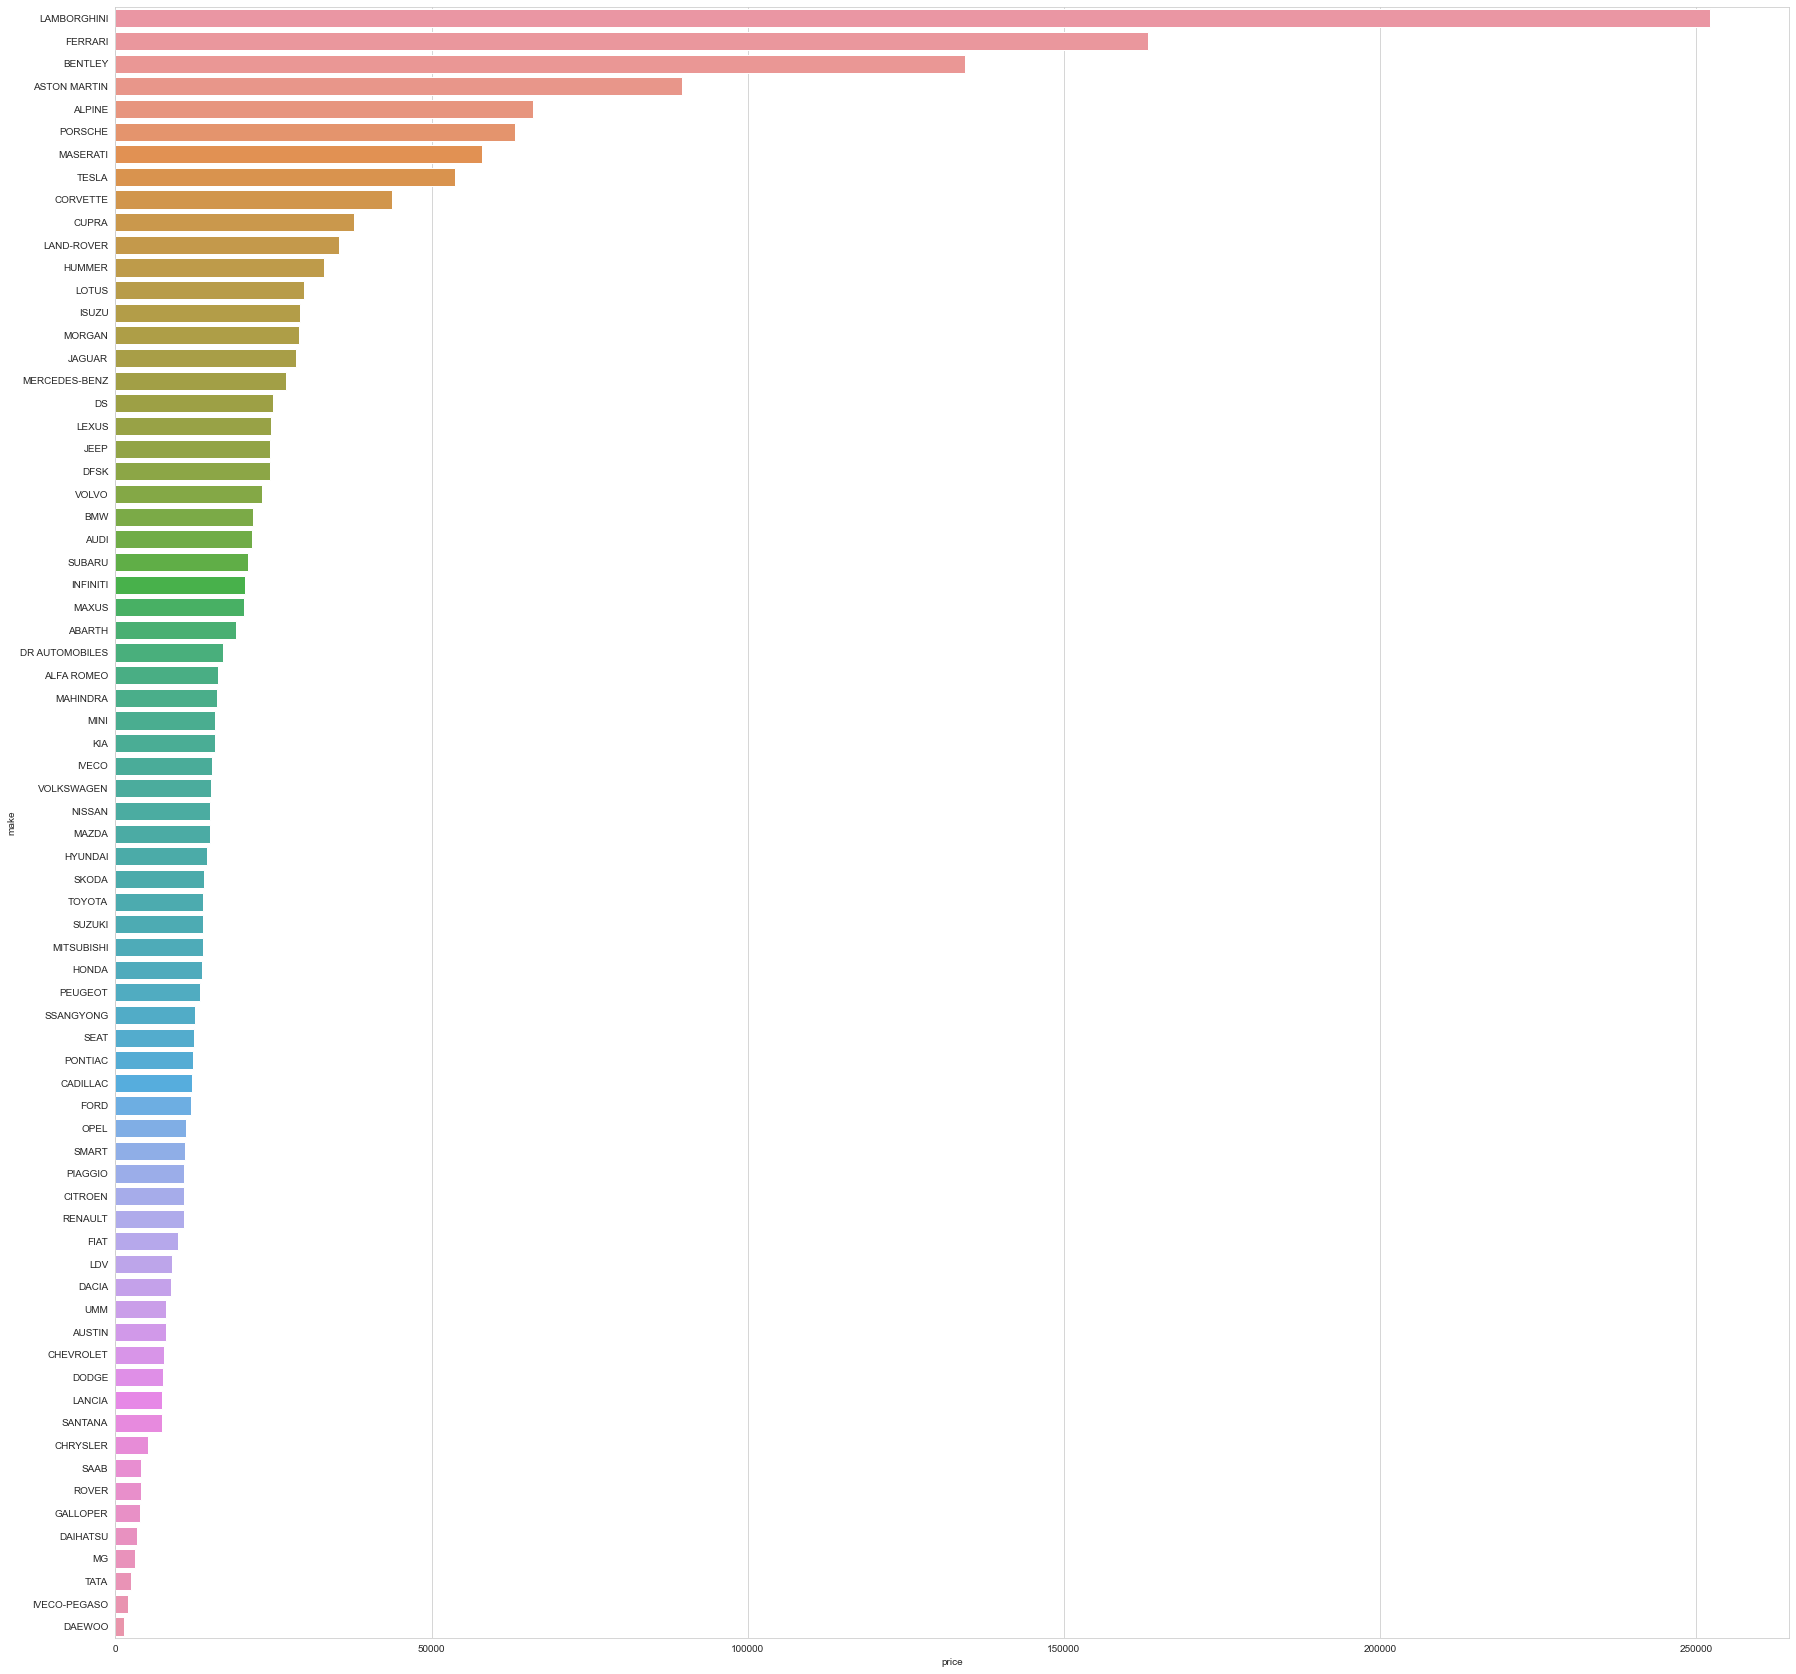

In [73]:
plt.figure(figsize=(30,30))
sns.barplot(x='price',y='make',data=p_marcas)

# Lectura del dataset limpio

In [34]:
df_1 = pd.read_csv('data/coches_segunda_mano_ML.csv')
df_1.head()

,Marca,Modelo,Precio,Tipo_Combustible,Año,kms,CV,N_Puertas,Tipo_Cambio,color,N_Fotos,Provincia
0,1,172,6200,4,2017.0,50071,82.0,2,2,3,6,42
1,1,814,7851,3,2016.0,103000,100.0,2,2,3,10,7
2,1,221,19426,3,2014.0,120000,140.0,2,2,3,9,33
3,1,813,22850,3,2017.0,107000,130.0,3,2,3,4,39
4,1,40,11490,4,2016.0,78665,130.0,2,2,3,32,29


In [35]:
df_1.describe()

,Marca,Modelo,Precio,Tipo_Combustible,Año,kms,CV,N_Puertas,Tipo_Cambio,color,N_Fotos,Provincia
count,41472.000000,41472.000000,41472.00000,41472.000000,41472.000000,4.147200e+04,41472.000000,41472.000000,41472.000000,41472.000000,41472.000000,41472.000000
mean,1.469088,444.223790,17356.67759,3.454982,2013.861545,9.789041e+04,146.396388,1.966435,2.336058,3.464144,18.611907,25.442660
std,0.756099,266.939003,17149.61004,0.649897,5.768623,8.269716e+04,71.283964,0.367709,0.477997,0.742394,12.177026,14.818778
min,1.000000,1.000000,300.00000,1.000000,1980.000000,0.000000e+00,29.000000,1.000000,1.000000,2.000000,0.000000,0.000000
25%,1.000000,211.000000,7999.00000,3.000000,2010.000000,2.941125e+04,109.000000,2.000000,2.000000,3.000000,9.000000,8.000000
50%,1.000000,430.000000,13995.00000,3.000000,2016.000000,8.499600e+04,130.000000,2.000000,2.000000,4.000000,16.000000,29.000000
75%,2.000000,683.000000,21641.75000,4.000000,2018.000000,1.460000e+05,163.000000,2.000000,3.000000,4.000000,26.000000,37.000000
max,5.000000,940.000000,549900.00000,6.000000,2021.000000,2.650000e+06,800.000000,3.000000,3.000000,4.000000,54.000000,52.000000


In [1]:
from funciones import data_report

In [36]:
data_report(df_1)

COL_N,Marca,Modelo,Precio,Tipo_Combustible,Año,kms,CV,N_Puertas,Tipo_Cambio,color,N_Fotos,Provincia
DATA_TYPE,int64,int64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,5,884,3279,5,41,13174,347,3,3,3,55,53
CARDIN (%),0.01,2.13,7.91,0.01,0.1,31.77,0.84,0.01,0.01,0.01,0.13,0.13


## Creación dataset de Test

In [38]:
X = df_1.drop(['Precio'],axis=1)
y = df_1['Precio']

In [39]:
print(X.shape)
print(y.shape)

(41472, 11)
(41472,)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_test.to_csv('data/test.csv')

## Primer Pipeline, con Model_V0

In [44]:
pipe = make_pipeline(StandardScaler(),LinearRegression())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [45]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [46]:
pipe.predict(X_test)

array([ 5701.46059742,  9139.68154849, -1138.30738622, ...,
        6065.38857725, 19490.17075075, 33111.21032444])

In [52]:
print("Accuracy train", pipe.score(X_train, y_train))
print("Accuracy test", pipe.score(X_test, y_test))

Accuracy train 0.6877527149426912
Accuracy test 0.6575555560502355


In [63]:
with open('model_v0','wb') as archivo_salida:
    pickle.dump(pipe,archivo_salida)

## Probando modelo_v0

In [64]:
with open('model_v0', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [65]:
loaded_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [66]:
loaded_model.predict(X_test)

array([ 5701.46059742,  9139.68154849, -1138.30738622, ...,
        6065.38857725, 19490.17075075, 33111.21032444])